In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('C:\\Users\\sh921\\Desktop\\gamemaster_0820.csv')
df.head()

,gameName,gameID,date,gameShares,gameGenreShares,timeCountTotal,search,total,p+n,positive,...,c_totalmedia,c_p_n,c_pos,c_neg,cnum_nonzero,c_avg_media,c_avg_p+n,c_avg_pos,c_avg_neg,c_avg_neu
0,리그오브레전드,1,2020-12-31 0:00,43.96,93.28,20.021294,6.54793,11.945078,10.618386,10.043027,...,5.700440,4.807355,4.392317,3.000000,2.807355,3.247928,2.459432,2.115477,1.115477,2.321928
1,리그오브레전드,1,2020-12-30 0:00,44.90,93.55,19.928705,6.17327,11.915879,10.531381,9.894818,...,11.532356,10.260920,9.681238,8.668885,2.807355,8.949827,7.681824,7.105035,6.101538,8.180738
2,리그오브레전드,1,2020-12-29 0:00,44.37,93.55,19.853389,5.82425,11.942515,10.633903,10.080818,...,11.534789,10.258566,9.672425,8.679480,2.807355,8.952256,7.679480,7.096276,6.112005,8.186527
3,리그오브레전드,1,2020-12-28 0:00,44.04,93.63,19.867525,5.72779,12.107217,10.804938,10.178665,...,11.529431,10.258566,9.675957,8.672425,2.807355,8.946906,7.679480,7.099786,6.105035,8.177420
4,리그오브레전드,1,2020-12-27 0:00,42.77,93.34,20.208988,6.05270,11.829723,10.440869,9.764872,...,11.536733,10.265615,9.682995,8.679480,2.807355,8.954196,7.686501,7.106781,6.112005,8.184875


# ADF test

dependent variable

In [39]:
mydata = df[["gameShares","gameGenreShares", 'timeCountTotal']]
mydata.index = df["date"]

In [40]:
adfuller_test = adfuller(mydata['gameShares'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -14.405490312749519
p-value: 8.371225957766097e-27


In [41]:
adfuller_test = adfuller(mydata['gameGenreShares'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.075877871315678
p-value: 1.5060488156068051e-12


In [43]:
adfuller_test = adfuller(mydata['timeCountTotal'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -6.183992718465242
p-value: 6.354402642191283e-08


## main independent variable

In [49]:
mydata2 = df[["search","total", 'positive',"negative"]]
mydata2.index = df["date"]

In [50]:
adfuller_test = adfuller(mydata2['search'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.563325617039698
p-value: 8.577714550995174e-14


In [51]:
adfuller_test = adfuller(mydata2['total'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -6.99909526412217
p-value: 7.401321268200912e-10


In [52]:
adfuller_test = adfuller(mydata2['positive'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.496474465403201
p-value: 4.36619297893344e-11


In [53]:
adfuller_test = adfuller(mydata2['negative'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.881948758641697
p-value: 4.6773091979912625e-12


## submodel independent variable

In [55]:
mydata3 = df[["sns","image", 'blog',"firm","snsPosi","imagePosi","blogPosi","firmPosi","snsNega","imageNega","blogNega","firmNega"]]
mydata3.index = df["date"]

In [56]:
adfuller_test = adfuller(mydata3['sns'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.54411868367738
p-value: 9.605734111199323e-14


In [57]:
adfuller_test = adfuller(mydata3['image'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.880895635370797
p-value: 4.706112258344786e-12


In [58]:
adfuller_test = adfuller(mydata3['blog'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.703224564222089
p-value: 1.3222688146760904e-11


In [59]:
adfuller_test = adfuller(mydata3['firm'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.603734574763996
p-value: 6.759750415532157e-14


In [60]:
adfuller_test = adfuller(mydata3['snsPosi'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -9.711141629075549
p-value: 1.0108299072529778e-16


In [62]:
adfuller_test = adfuller(mydata3['imagePosi'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.695366369903585
p-value: 3.9382773842060275e-14


In [34]:
adfuller_test = adfuller(mydata3['snsNega'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.603734574763996
p-value: 6.759750415532157e-14


In [35]:
adfuller_test = adfuller(mydata3['imageNega'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -55.36123007791009
p-value: 0.0


In [63]:
adfuller_test = adfuller(mydata3['blogNega'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.51030321100911
p-value: 1.172369895425655e-13


# KPS TEST


In [65]:
#dependent variable
from statsmodels.tsa.stattools import kpss
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}') 
    print(f'p-value: {p_value}') 
    print(f'num lags: {n_lags}') 
    print('Critial Values:') 
    for key, value in critical_values.items(): 
        print(f' {key} : {value}') 
        
print('KPSS Test: gameShares time series') 
kpss_test(mydata['gameShares']) 
print('KPSS Test: gameGenreShares time series') 
kpss_test(mydata['gameGenreShares']) 
print('KPSS Test: timeCountTotal time series') 
kpss_test(mydata['timeCountTotal']) 



KPSS Test: gameShares time series
KPSS Statistic: 4.720960155083162
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: gameGenreShares time series
KPSS Statistic: 1.440751704748388
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: timeCountTotal time series
KPSS Statistic: 24.567721455699406
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [66]:
#main model independent variable
        
print('KPSS Test: search time series') 
kpss_test(mydata2['search']) 

print('KPSS Test: total time series') 
kpss_test(mydata2['total']) 

print('KPSS Test: positive time series') 
kpss_test(mydata2['positive']) 

print('KPSS Test: positive time series') 
kpss_test(mydata2['negative']) 

KPSS Test: search time series
KPSS Statistic: 2.4124791268297594
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: total time series
KPSS Statistic: 27.94880100002088
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: positive time series
KPSS Statistic: 24.356841609918426
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: positive time series
KPSS Statistic: 20.126144182119805
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

In [68]:
print('KPSS Test: sns time series') 
kpss_test(mydata3['sns']) 
print('KPSS Test: image time series') 
kpss_test(mydata3['image']) 
print('KPSS Test: blog time series') 
kpss_test(mydata3['blog']) 
print('KPSS Test: firm time series') 
kpss_test(mydata3['firm']) 
print('KPSS Test: snsPosi time series') 
kpss_test(mydata3['snsPosi']) 
print('KPSS Test: imagePosi time series') 
kpss_test(mydata3['imagePosi']) 
print('KPSS Test: blogPosi time series') 
kpss_test(mydata3['blogPosi']) 
print('KPSS Test: firmPosi time series') 
kpss_test(mydata3['firmPosi']) 
print('KPSS Test: snsNega time series') 
kpss_test(mydata3['snsNega']) 
print('KPSS Test: imageNega time series') 
kpss_test(mydata3['imageNega']) 
print('KPSS Test: blogNega time series') 
kpss_test(mydata3['blogNega']) 
print('KPSS Test: firmNega time series') 
kpss_test(mydata3['firmNega']) 


KPSS Test: sns time series
KPSS Statistic: 15.770466057669566
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: image time series
KPSS Statistic: 16.84581187091078
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: blog time series
KPSS Statistic: 22.606912691012234
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: firm time series
KPSS Statistic: 19.51543391315337
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: snsPosi time series
KPSS Statistic: 9.378188857619332
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: imagePosi time series
KPSS Statistic: 9.793947832512208
p-value: 0.01
num lags: 58
Critial Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS Test: blogPosi time series
KPSS Statistic: 19.446

C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

# acf, pacf 

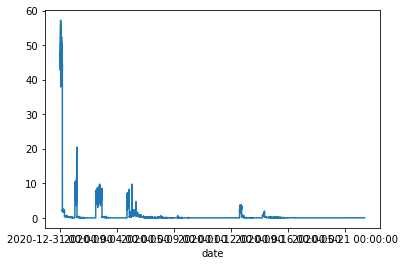

In [72]:
mydata["gameShares"].plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

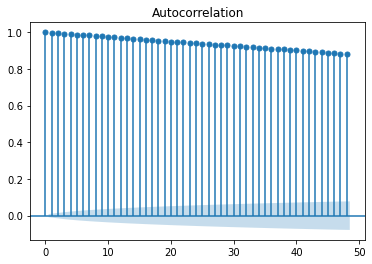

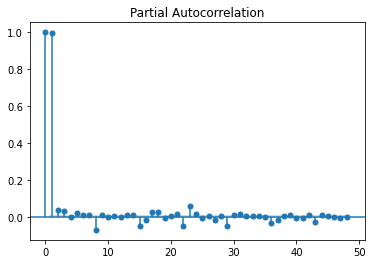

<Figure size 1440x288 with 0 Axes>

In [76]:
mydata = df[["gameShares"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

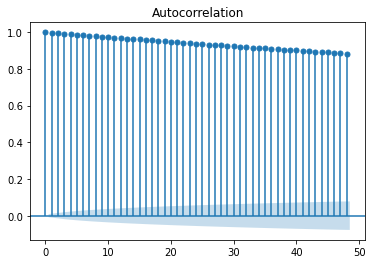

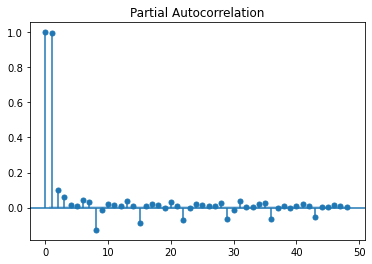

<Figure size 1440x288 with 0 Axes>

In [77]:
mydata = df[["gameGenreShares"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

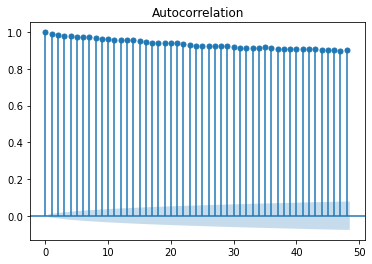

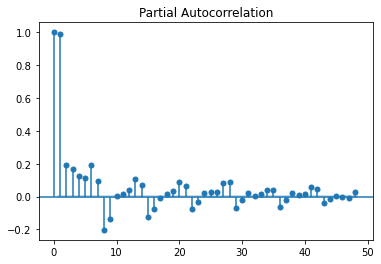

<Figure size 1440x288 with 0 Axes>

In [78]:
mydata = df[["timeCountTotal"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

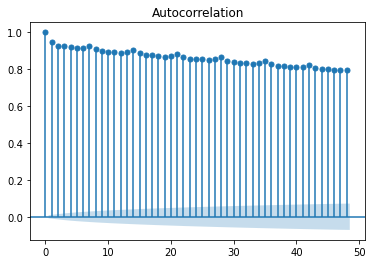

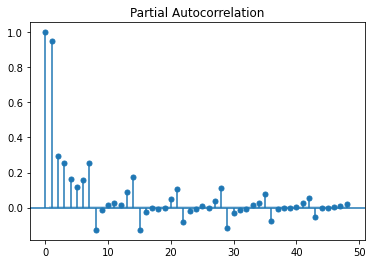

<Figure size 1440x288 with 0 Axes>

In [79]:
mydata = df[["search"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

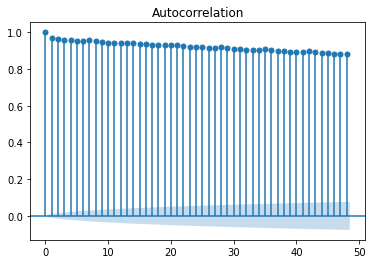

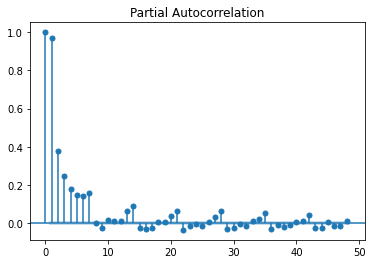

<Figure size 1440x288 with 0 Axes>

In [80]:
mydata = df[["total"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

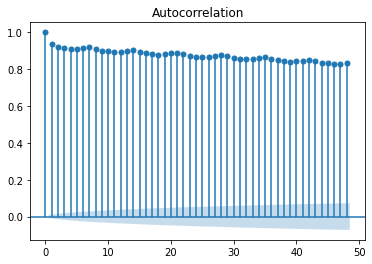

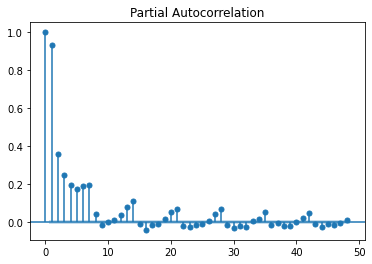

<Figure size 1440x288 with 0 Axes>

In [85]:
mydata = df[["positive"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

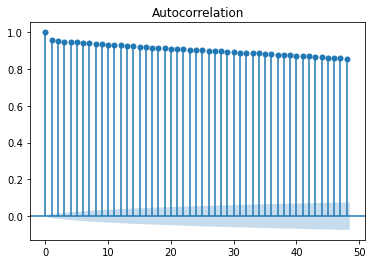

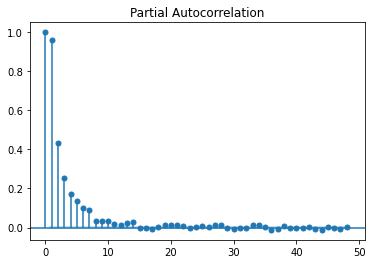

<Figure size 1440x288 with 0 Axes>

In [86]:
mydata = df[["negative"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

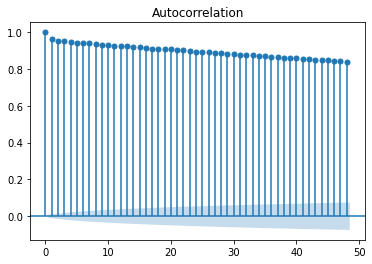

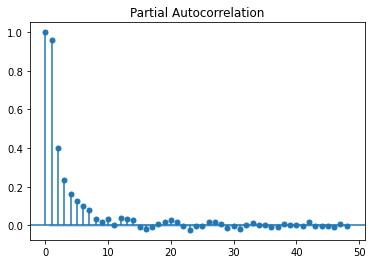

<Figure size 1440x288 with 0 Axes>

In [87]:
mydata = df[["sns"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

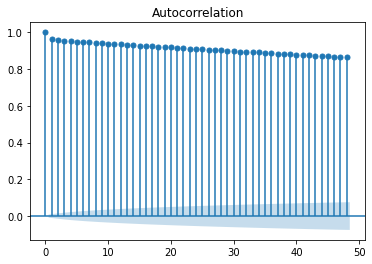

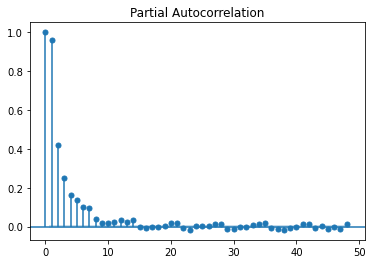

<Figure size 1440x288 with 0 Axes>

In [88]:
mydata = df[["image"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

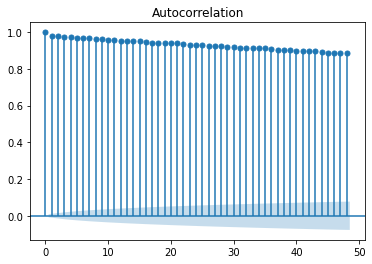

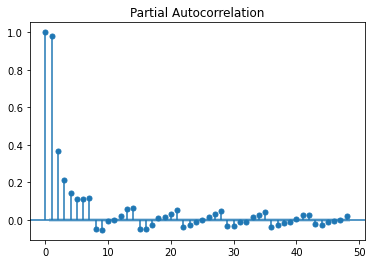

<Figure size 1440x288 with 0 Axes>

In [89]:
mydata = df[['blog']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

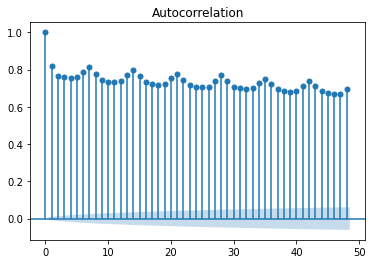

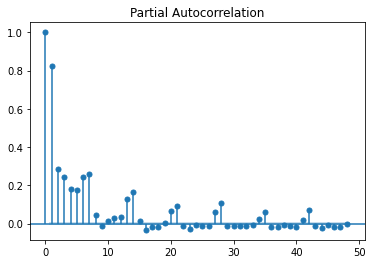

<Figure size 1440x288 with 0 Axes>

In [90]:
mydata = df[['firm']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

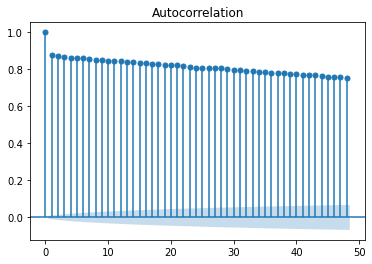

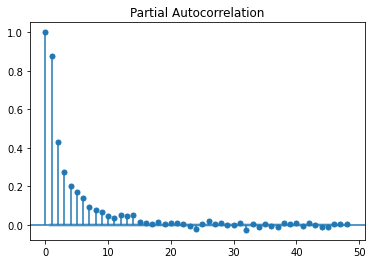

<Figure size 1440x288 with 0 Axes>

In [91]:
mydata = df[['snsPosi']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

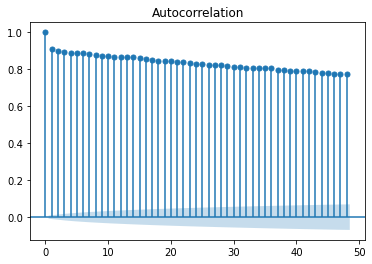

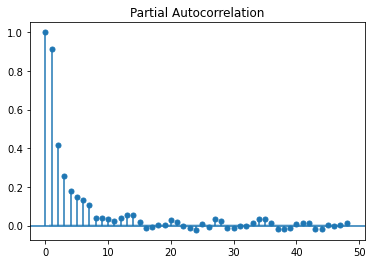

<Figure size 1440x288 with 0 Axes>

In [92]:
mydata = df[['imagePosi']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

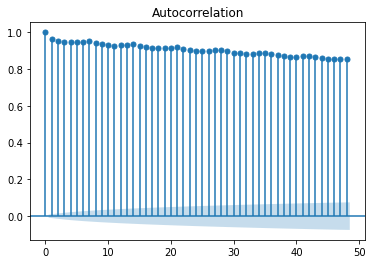

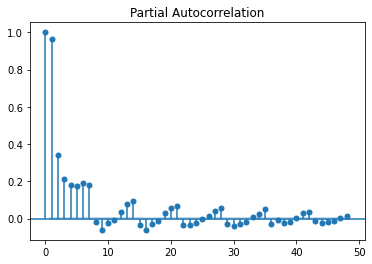

<Figure size 1440x288 with 0 Axes>

In [93]:
mydata = df[['blogPosi']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

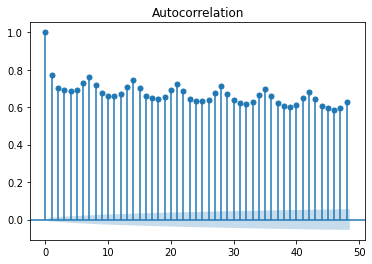

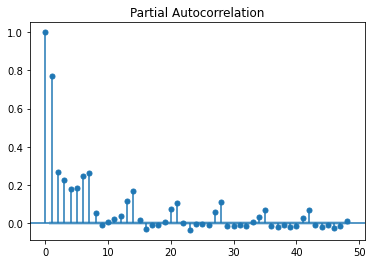

<Figure size 1440x288 with 0 Axes>

In [94]:
mydata = df[['firmPosi']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

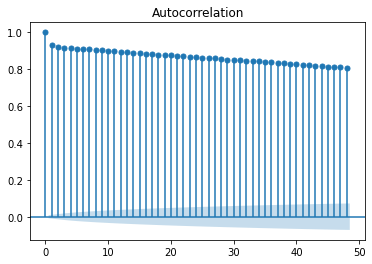

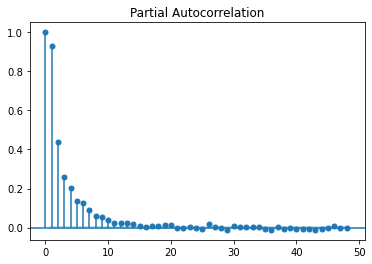

<Figure size 1440x288 with 0 Axes>

In [95]:
mydata = df[['snsNega']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

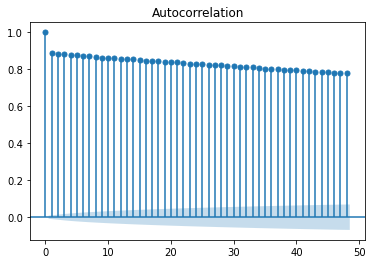

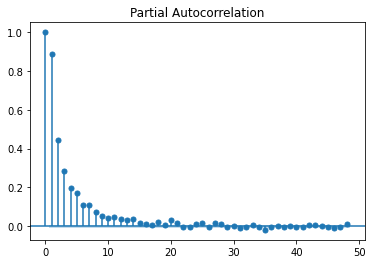

<Figure size 1440x288 with 0 Axes>

In [96]:
mydata = df[['imageNega']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

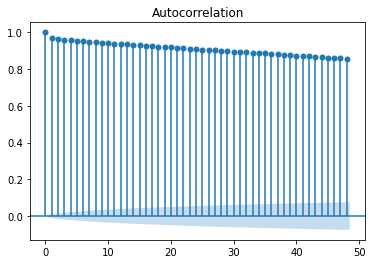

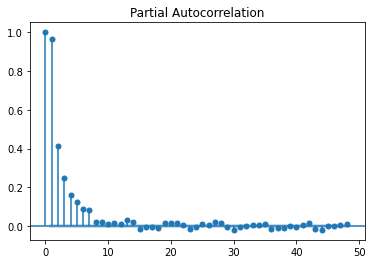

<Figure size 1440x288 with 0 Axes>

In [97]:
mydata = df[['blogNega']]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

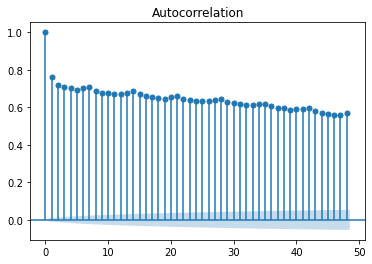

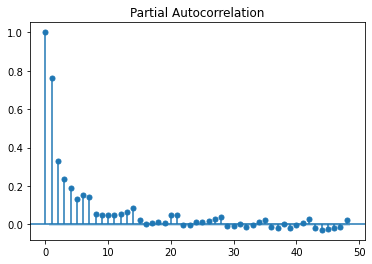

<Figure size 1440x288 with 0 Axes>

In [98]:
mydata = df[["firmNega"]]
mydata.index = df["date"]

plot_acf(mydata)
plot_pacf(mydata)
plt.figure(figsize=(20,4))
plt.show

# 공적분 검증

In [18]:
#gameShares AND other independent

In [13]:
from statsmodels.tsa.stattools import coint
X = df[['date','gameShares']]
Y = df[['date','search']]

score, p_value, _ = coint(X.gameShares,Y.search)
print('Correlation: ' , X.gameShares.corr(Y.search))
print('Cointegration test p-value: ' ,p_value)

Correlation:  -0.021281987379811816
Cointegration test p-value:  8.099419606133166e-26


In [15]:
X = df[['date','gameShares']]
Y = df[['date','total']]

score, p_value, _ = coint(X.gameShares,Y.total)
print('Correlation: ' , X.gameShares.corr(Y.total))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.33177519970565666
Cointegration test p-value:  6.2214578480480105e-25


In [16]:
X = df[['date','gameShares']]
Y = df[['date','positive']]

score, p_value, _ = coint(X.gameShares,Y.positive)
print('Correlation: ' , X.gameShares.corr(Y.positive))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.36562745189487617
Cointegration test p-value:  1.2356645589725982e-24


In [17]:
X = df[['date','gameShares']]
Y = df[['date','negative']]

score, p_value, _ = coint(X.gameShares,Y.negative)
print('Correlation: ' , X.gameShares.corr(Y.negative))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.3921482909302694
Cointegration test p-value:  1.945782311222358e-24


In [19]:
#timeCountTotal AND other independent

In [21]:
X = df[['date','timeCountTotal']]
Y = df[['date','search']]

score, p_value, _ = coint(X.timeCountTotal,Y.search)
print('Correlation: ' , X.timeCountTotal.corr(Y.search))
print('Cointegration test p-value: ' ,p_value)

Correlation:  -0.10139600514536729
Cointegration test p-value:  6.163981917862e-07


In [22]:
X = df[['date','timeCountTotal']]
Y = df[['date','total']]

score, p_value, _ = coint(X.timeCountTotal,Y.total)
print('Correlation: ' , X.timeCountTotal.corr(Y.total))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.614230363216674
Cointegration test p-value:  9.89291464423408e-11


In [23]:
X = df[['date','timeCountTotal']]
Y = df[['date','positive']]

score, p_value, _ = coint(X.timeCountTotal,Y.positive)
print('Correlation: ' , X.timeCountTotal.corr(Y.positive))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.5885816437110853
Cointegration test p-value:  2.6734794916491767e-10


In [24]:
X = df[['date','timeCountTotal']]
Y = df[['date','negative']]

score, p_value, _ = coint(X.timeCountTotal,Y.negative)
print('Correlation: ' , X.timeCountTotal.corr(Y.negative))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.5902644472437891
Cointegration test p-value:  4.075027063951721e-10


# grangercausalitytests

In [23]:
mydata = df[["search","gameShares"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5477  , p=0.4592  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=0.5478  , p=0.4592  , df=1
likelihood ratio test: chi2=0.5478  , p=0.4592  , df=1
parameter F test:         F=0.5477  , p=0.4592  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1028  , p=0.0022  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=12.2068 , p=0.0022  , df=2
likelihood ratio test: chi2=12.2054 , p=0.0022  , df=2
parameter F test:         F=6.1028  , p=0.0022  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3771  , p=0.0044  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=13.1330 , p=0.0044  , df=3
likelihood ratio test: chi2=13.1314 , p=0.0044  , df=3
parameter F test:         F=4.3771  , p=0.0044  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2007  

{1: ({'ssr_ftest': (0.5477381810150469, 0.4592465994053394, 53432.0, 1),
   'ssr_chi2test': (0.547768934393978, 0.45923074194009983, 1),
   'lrtest': (0.5477661268087104, 0.4592318927369645, 1),
   'params_ftest': (0.547738180993477, 0.45924659941263435, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.102811190386937, 0.002238130821479895, 53429.0, 2),
   'ssr_chi2test': (12.206764609000192, 0.002235294472638329, 2),
   'lrtest': (12.205370530136861, 0.0022368531041778573, 2),
   'params_ftest': (6.102811190369431, 0.0022381308215199524, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.377103370833947, 0.0043641106138052, 53426.0, 3),
   'ssr_chi2test': (13.133030607593883, 0.004357575296912675, 3),
   'lrtest': (13.131416920921765, 0.0043608583073764156, 3),
   'params_ftest': (4.377103370825167, 0.004364110613871194, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

In [24]:
mydata = df[["total","gameShares"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=98.8036 , p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=98.8091 , p=0.0000  , df=1
likelihood ratio test: chi2=98.7179 , p=0.0000  , df=1
parameter F test:         F=98.8036 , p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=30.5507 , p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=61.1071 , p=0.0000  , df=2
likelihood ratio test: chi2=61.0722 , p=0.0000  , df=2
parameter F test:         F=30.5507 , p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.4482 , p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=64.3532 , p=0.0000  , df=3
likelihood ratio test: chi2=64.3144 , p=0.0000  , df=3
parameter F test:         F=21.4482 , p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=22.9722 

{1: ({'ssr_ftest': (98.80358962024327, 2.921116213097e-23, 53432.0, 1),
   'ssr_chi2test': (98.80913705939697, 2.780486243628971e-23, 1),
   'lrtest': (98.71789324500423, 2.9115941384036426e-23, 1),
   'params_ftest': (98.80358962030827, 2.9211162130005477e-23, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (30.550696448883308, 5.4901217455984487e-14, 53429.0, 2),
   'ssr_chi2test': (61.10711089669021, 5.3797174465803923e-14, 2),
   'lrtest': (61.072196473454824, 5.474456849383046e-14, 2),
   'params_ftest': (30.55069644886649, 5.4901217456955246e-14, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (21.44824552887012, 7.057728747737426e-14, 53426.0, 3),
   'ssr_chi2test': (64.35316718512243, 6.897794283393554e-14, 3),
   'lrtest': (64.31444572092732, 7.030588591428431e-14, 3),
   'params_ftest': (21.4482455288752, 7.057728747677624e-14, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0

In [25]:
mydata = df[["positive","gameShares"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=271.4009, p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=271.4161, p=0.0000  , df=1
likelihood ratio test: chi2=270.7291, p=0.0000  , df=1
parameter F test:         F=271.4009, p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=67.5309 , p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=135.0744, p=0.0000  , df=2
likelihood ratio test: chi2=134.9040, p=0.0000  , df=2
parameter F test:         F=67.5309 , p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=33.6200 , p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=100.8732, p=0.0000  , df=3
likelihood ratio test: chi2=100.7781, p=0.0000  , df=3
parameter F test:         F=33.6200 , p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=26.1256 

{1: ({'ssr_ftest': (271.40089503322815, 7.94072465269597e-61, 53432.0, 1),
   'ssr_chi2test': (271.41613314307057, 5.575350078452698e-61, 1),
   'lrtest': (270.72914699069224, 7.870378597530995e-61, 1),
   'params_ftest': (271.4008950332677, 7.940724652552432e-61, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (67.5308773337949, 5.1135129958740995e-30, 53429.0, 2),
   'ssr_chi2test': (135.0743940352242, 4.6662500978167934e-30, 2),
   'lrtest': (134.90395571352565, 5.0813396276612575e-30, 2),
   'params_ftest': (67.53087733389015, 5.113512995402778e-30, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (33.619984475655066, 1.0637171090266678e-21, 53426.0, 3),
   'ssr_chi2test': (100.87316833494988, 1.0086506868127422e-21, 3),
   'lrtest': (100.77807159868826, 1.0572797642626396e-21, 3),
   'params_ftest': (33.619984475639626, 1.0637171090535748e-21, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0.,

In [26]:
mydata = df[["negative","gameShares"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=193.6527, p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=193.6636, p=0.0000  , df=1
likelihood ratio test: chi2=193.3135, p=0.0000  , df=1
parameter F test:         F=193.6527, p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=54.5886 , p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=109.1874, p=0.0000  , df=2
likelihood ratio test: chi2=109.0760, p=0.0000  , df=2
parameter F test:         F=54.5886 , p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=38.9841 , p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=116.9677, p=0.0000  , df=3
likelihood ratio test: chi2=116.8399, p=0.0000  , df=3
parameter F test:         F=38.9841 , p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=45.7115 

{1: ({'ssr_ftest': (193.65268367172703, 6.05160490199454e-44, 53432.0, 1),
   'ssr_chi2test': (193.6635565204135, 5.043068363164228e-44, 1),
   'lrtest': (193.3134564157226, 6.013219755609502e-44, 1),
   'params_ftest': (193.6526836718364, 6.05160490165132e-44, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (54.588571251403124, 2.0733557441974934e-24, 53429.0, 2),
   'ssr_chi2test': (109.18735953311777, 1.9510398079413863e-24, 2),
   'lrtest': (109.07595421523729, 2.0628017349058547e-24, 2),
   'params_ftest': (54.58857125136245, 2.073355744283971e-24, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (38.984134012599185, 3.723979396614164e-25, 53426.0, 3),
   'ssr_chi2test': (116.96772541619504, 3.4707288811074916e-25, 3),
   'lrtest': (116.83988760791544, 3.6978289817474084e-25, 3),
   'params_ftest': (38.98413401263988, 3.7239793963842753e-25, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

In [27]:
mydata = df[["search","timeCountTotal"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1500  , p=0.0233  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=5.1503  , p=0.0232  , df=1
likelihood ratio test: chi2=5.1501  , p=0.0232  , df=1
parameter F test:         F=5.1500  , p=0.0233  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7948  , p=0.4517  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=1.5898  , p=0.4516  , df=2
likelihood ratio test: chi2=1.5898  , p=0.4516  , df=2
parameter F test:         F=0.7948  , p=0.4517  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0558  , p=0.3665  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=3.1678  , p=0.3665  , df=3
likelihood ratio test: chi2=3.1677  , p=0.3665  , df=3
parameter F test:         F=1.0558  , p=0.3665  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=43.7276 

{1: ({'ssr_ftest': (5.15001277223885, 0.023250169976863376, 53432.0, 1),
   'ssr_chi2test': (5.150301925523712, 0.0232423314320038, 1),
   'lrtest': (5.150053736986592, 0.023245653693144585, 1),
   'params_ftest': (5.150012772210155, 0.023250169977164704, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7948396739104949, 0.45165898144744643, 53429.0, 2),
   'ssr_chi2test': (1.58982811341157, 0.4516200469693209, 2),
   'lrtest': (1.5898044626810588, 0.4516253875729104, 2),
   'params_ftest': (0.7948396739025974, 0.45165898145280503, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0557994019711612, 0.3665381438663181, 53426.0, 3),
   'ssr_chi2test': (3.167813205865593, 0.36646832039525895, 3),
   'lrtest': (3.1677193065406755, 0.36648200012121945, 3),
   'params_ftest': (1.0557994019663735, 0.3665381438698991, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [28]:
mydata = df[["total","timeCountTotal"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=622.1581, p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=622.1930, p=0.0000  , df=1
likelihood ratio test: chi2=618.5985, p=0.0000  , df=1
parameter F test:         F=622.1581, p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=161.6266, p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=323.2835, p=0.0000  , df=2
likelihood ratio test: chi2=322.3095, p=0.0000  , df=2
parameter F test:         F=161.6266, p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=80.9305 , p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=242.8233, p=0.0000  , df=3
likelihood ratio test: chi2=242.2732, p=0.0000  , df=3
parameter F test:         F=80.9305 , p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=79.3540 

{1: ({'ssr_ftest': (622.1580892165614, 1.5395273215552715e-136, 53432.0, 1),
   'ssr_chi2test': (622.1930209853076, 2.493356762479186e-137, 1),
   'lrtest': (618.5985130720364, 1.5086066168214511e-136, 1),
   'params_ftest': (622.1580892166263, 1.539527321504427e-136, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (161.6266248711919, 1.0421655488879526e-70, 53429.0, 2),
   'ssr_chi2test': (323.2835004723004, 6.307827777085106e-71, 2),
   'lrtest': (322.3094709923171, 1.026567808669998e-70, 2),
   'params_ftest': (161.62662487117439, 1.0421655489068207e-70, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (80.93049033449682, 3.1138038712737312e-52, 53426.0, 3),
   'ssr_chi2test': (242.8232821122582, 2.3332274435101105e-52, 3),
   'lrtest': (242.27319961178, 3.0684391110529162e-52, 3),
   'params_ftest': (80.93049033451312, 3.1138038711908512e-52, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

In [29]:
mydata = df[["positive","timeCountTotal"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1135.4801, p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=1135.5438, p=0.0000  , df=1
likelihood ratio test: chi2=1123.6464, p=0.0000  , df=1
parameter F test:         F=1135.4801, p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=318.1237, p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=636.3070, p=0.0000  , df=2
likelihood ratio test: chi2=632.5481, p=0.0000  , df=2
parameter F test:         F=318.1237, p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=157.5713, p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=472.7757, p=0.0000  , df=3
likelihood ratio test: chi2=470.6964, p=0.0000  , df=3
parameter F test:         F=157.5713, p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=105.

{1: ({'ssr_ftest': (1135.4800845447385, 2.4860715300470934e-246, 53432.0, 1),
   'ssr_chi2test': (1135.5438373567918, 6.219353336071637e-249, 1),
   'lrtest': (1123.64641103358, 2.3961920197409594e-246, 1),
   'params_ftest': (1135.480084544832, 2.486071529934323e-246, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (318.12372365814196, 4.5370084482544503e-138, 53429.0, 2),
   'ssr_chi2test': (636.3069887120911, 6.725011060205788e-139, 2),
   'lrtest': (632.5481396086398, 4.404703859471467e-138, 2),
   'params_ftest': (318.12372365820926, 4.537008447954514e-138, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (157.57126655362214, 1.0995305690041355e-101, 53426.0, 3),
   'ssr_chi2test': (472.7757357331464, 3.786489497389759e-102, 3),
   'lrtest': (470.69642958456825, 1.0685608160444984e-101, 3),
   'params_ftest': (157.57126655362973,
    1.0995305689942603e-101,
    53426.0,
    3.0)},
   array([[0., 0., 0., 1., 0., 

In [30]:
mydata = df[["negative","timeCountTotal"]]
grangercausalitytests(mydata,maxlag=4,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=610.3880, p=0.0000  , df_denom=53432, df_num=1
ssr based chi2 test:   chi2=610.4223, p=0.0000  , df=1
likelihood ratio test: chi2=606.9620, p=0.0000  , df=1
parameter F test:         F=610.3880, p=0.0000  , df_denom=53432, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=120.5182, p=0.0000  , df_denom=53429, df_num=2
ssr based chi2 test:   chi2=241.0590, p=0.0000  , df=2
likelihood ratio test: chi2=240.5169, p=0.0000  , df=2
parameter F test:         F=120.5182, p=0.0000  , df_denom=53429, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=48.0496 , p=0.0000  , df_denom=53426, df_num=3
ssr based chi2 test:   chi2=144.1677, p=0.0000  , df=3
likelihood ratio test: chi2=143.9736, p=0.0000  , df=3
parameter F test:         F=48.0496 , p=0.0000  , df_denom=53426, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=35.6247 

{1: ({'ssr_ftest': (610.3879936337504, 5.226073508796604e-134, 53432.0, 1),
   'ssr_chi2test': (610.422264557184, 9.055360394319184e-135, 1),
   'lrtest': (606.9619699493924, 5.123061693815937e-134, 1),
   'params_ftest': (610.3879936338582, 5.226073508513795e-134, 53432.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (120.51821830692595, 5.988411365817611e-53, 53429.0, 2),
   'ssr_chi2test': (241.05899331869512, 4.515488018715277e-53, 2),
   'lrtest': (240.5168735091138, 5.921401579259194e-53, 2),
   'params_ftest': (120.51821830688468, 5.988411366068147e-53, 53429.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (48.04960475374515, 5.3013052280820214e-31, 53426.0, 3),
   'ssr_chi2test': (144.16770097743782, 4.772404407409665e-31, 3),
   'lrtest': (143.97356050247618, 5.255398740172581e-31, 3),
   'params_ftest': (48.04960475377022, 5.3013052278924e-31, 53426.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0